In [1]:
import matplotlib.pyplot as plt
def freq_resp(b = [1], a = [1, -.9]):
    
    # Calculate the frequency response
    w, h = sig.freqz(b, a)

    # Plot the magnitude and phase response
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(w/np.pi, 20 * np.log10(abs(h)))
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Magnitude (dB)')
    plt.title('Magnitude Response')

    plt.subplot(2, 1, 2)
    plt.plot(w, np.angle(h, deg=True))
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Phase (degrees)')
    plt.title('Phase Response')

    plt.tight_layout()
    plt.show()

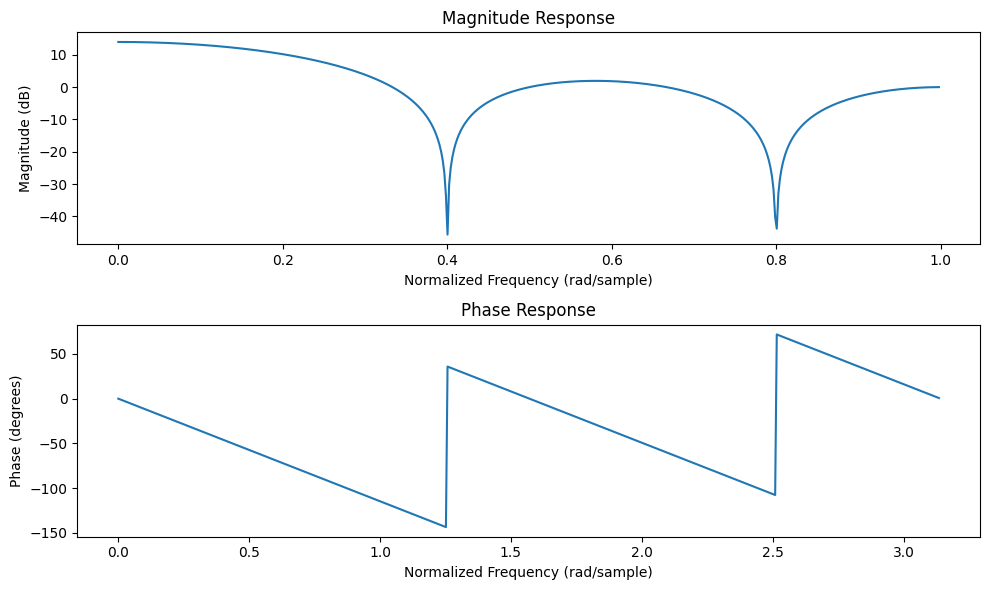

In [3]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
b = [1, 1, 1, 1, 1, ]
a = [1]
N  = 500 #number of iterations 
mu = .05
x = np.random.normal(0, 1, N)
d = sig.lfilter(b, a, x)
freq_resp(b, a)

In [6]:
L = 5
y = np.zeros_like(d)
e = np.zeros_like(d)
bhat = np.zeros([L+1, 1])
for n in range(L,N):
    xv = np.flip(x[n-L:n+1])
    y = np.dot(bhat.T, xv)
    e[n] = d[n]-y
    bhat = bhat + 2*mu*e[n]*xv

freq_resp(bhat.reshape(L+1,1), [1])
plt.plot(10*np.log10(e*e+.0000001))
plt.ylabel('MSE (dB)')
plt.xlabel('Iteration')
string = 'Mu = ' + str(mu)
plt.title(string)
plt.show()

C:\Users\npdho\AppData\Local\Temp\ipykernel_752\1094018835.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  e[n] = d[n]-y


ValueError: setting an array element with a sequence.